In [1]:
# import statements

import numpy as np
import matplotlib.pyplot as plt


In [2]:
def cleanSpectra(w, f, length, start=0):
    w = w[start:length+start]
    f = f[start:length+start]
    f = f/np.sum(f)
    return(w, f)

In [3]:
# read in spectral data

fileList = ["LS1_20211119f_1", "LS1_20220501f_1", "LS2_20211119f_1", "LS3_20211119f_2", "LS3_20211119f_3",
           "LS4_20211119f_1", "LS4_20211119f_2", "LS5_20211119f_2"]

fileNames, SCfileNames = [],[]
for i in range(len(fileList)):
    fileNames.append("../Data/Initial_M33_Regs/M33_" + fileList[i]+ ".spec")
    SCfileNames.append("../Data/StarlightModeling/M33_" + fileList[i]+ ".spec.SP")


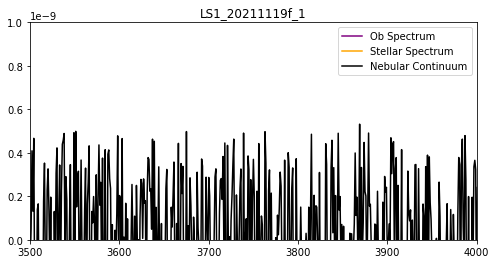

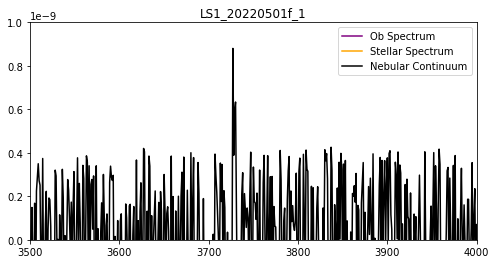

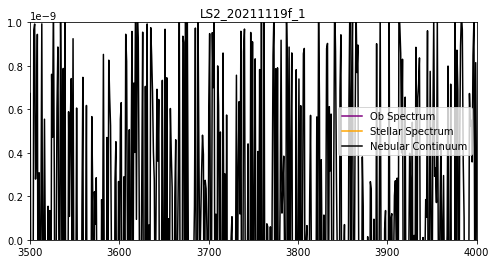

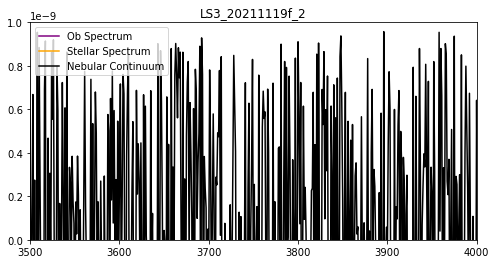

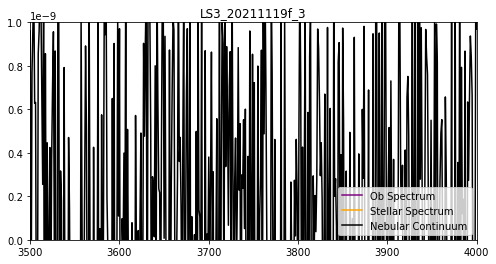

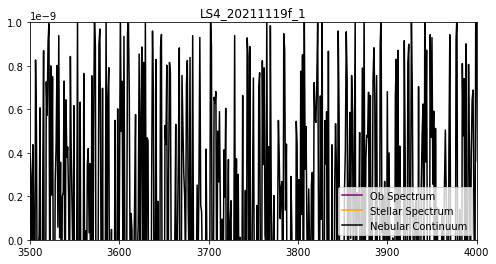

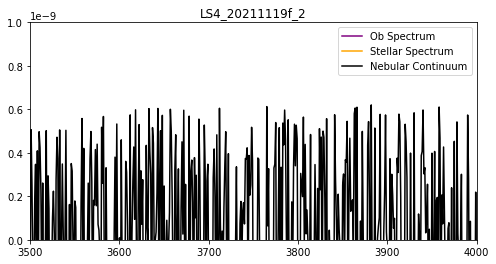

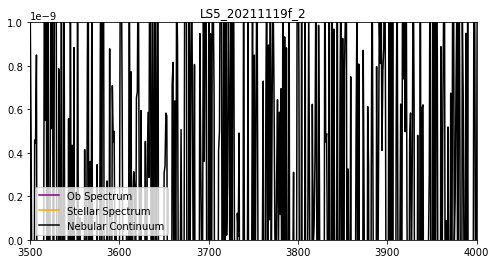

In [11]:
# plot spectra

# ylims = [0.013e-13,0.007e-13,0.039e-13,0.026e-13,0.026e-13,
#          0.05e-13,0.05e-13,0.13e-13]
# ylims = [x * 10 for x in ylims]

for i in range(len(fileNames)):
    # get spectra 
    wave, flux, err, weight = np.loadtxt(fileNames[i], unpack=True)
    waveSP, fluxSP, errSP, weightSP = np.loadtxt(SCfileNames[i], unpack=True)

    #normalize spectra
    wave, flux = cleanSpectra(wave,flux,len(fluxSP),start=300)
    waveSP,fluxSP = cleanSpectra(waveSP,fluxSP,len(fluxSP))
    nebular = flux-fluxSP
    
    fig = plt.figure(figsize=(8,4))
    plt.plot(wave, flux, color="purple", label = "Ob Spectrum")
    plt.plot(waveSP, fluxSP, color="orange", label = "Stellar Spectrum")
    plt.plot(waveSP, nebular, color="black", label = "Nebular Continuum")
    plt.legend(loc='best')
    plt.xlim(3500,4000)
    plt.ylim(0.0e-13,0.000000001)
    plt.title(fileList[i])
    plt.show()
    plt.close()

In [6]:
print(nebular)

[-1.30034754e-09 -2.96185655e-10 -1.64164433e-10 ... -1.16015497e-10
  1.17176759e-09  1.58409581e-09]
